In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
sns.set()

In [52]:
K18Mark4 = pd.read_excel("K18Mark.xlsx",na_values = ":", usecols = ["Mã SV","Họ","Tên","Lớp","Điểm hệ 4"], sheet_name = 'Khoa CNTT')
display(K18Mark4.head())
print("Shape:",K18Mark4.shape)
print(f"Min Điểm hệ 4: {K18Mark4['Điểm hệ 4'].min()}, max điểm hệ 4: {K18Mark4['Điểm hệ 4'].max()}")
print(f"Number of unique Lớp: {list(K18Mark4['Lớp'].unique())}")
print("***FREQUENCY***")
print(f"<<<Count of Lớp>>> \n{K18Mark4['Lớp'].value_counts()}")
print(f"<<<Count of Điểm>>> \n{K18Mark4['Điểm hệ 4'].value_counts()}")

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4
0,DTC1954802020002,Nguyễn Tuấn,Anh,ATTT K18A,2.14
1,DTC19H4802020005,Nguyễn Hoàng Khánh,Duy,ATTT K18A,2.29
2,DTC1954802020003,Mai Trung,Đức,ATTT K18A,2.93
3,DTC19H4802020008,Nguyễn Hoàng,Hà,ATTT K18A,3.43
4,DTC19H4802020003,Đào Văn,Hiếu,ATTT K18A,2.14


Shape: (327, 5)
Min Điểm hệ 4: 0.0, max điểm hệ 4: 4.0
Number of unique Lớp: ['ATTT K18A', 'CNTT K18 CLC', 'CNTT K18G', 'CNTT K18I', 'CNTT K18K', 'CNTT K18L', 'CNTT K18M', 'CNTT K18N', 'KHMT K18A', 'KTPM K18A', 'KTPM K18B', 'KTPM K18ĐT', 'MMT&TTDL K18A']
***FREQUENCY***
<<<Count of Lớp>>> 
CNTT K18G        49
KTPM K18A        42
KTPM K18B        37
CNTT K18I        31
CNTT K18M        30
CNTT K18N        29
CNTT K18 CLC     26
CNTT K18K        23
KTPM K18ĐT       23
CNTT K18L        21
ATTT K18A        12
KHMT K18A         2
MMT&TTDL K18A     2
Name: Lớp, dtype: int64
<<<Count of Điểm>>> 
0.00    23
3.00    17
2.25    12
2.06    11
2.44    10
        ..
2.37     1
3.77     1
3.55     1
2.19     1
1.81     1
Name: Điểm hệ 4, Length: 96, dtype: int64


In [53]:
nbins = 15
arrDiem = np.array(K18Mark4['Điểm hệ 4'])
bins = np.linspace(arrDiem.min()-0.0001, arrDiem.max(), nbins + 1)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18Mark4["binned"] = pd.cut(arrDiem, bins)
display(K18Mark4.head())
print(K18Mark4['binned'].value_counts())

Number of interval 15 bins is calculated:


array([-1.00000000e-04,  2.66573333e-01,  5.33246667e-01,  7.99920000e-01,
        1.06659333e+00,  1.33326667e+00,  1.59994000e+00,  1.86661333e+00,
        2.13328667e+00,  2.39996000e+00,  2.66663333e+00,  2.93330667e+00,
        3.19998000e+00,  3.46665333e+00,  3.73332667e+00,  4.00000000e+00])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC1954802020002,Nguyễn Tuấn,Anh,ATTT K18A,2.14,"(2.133, 2.4]"
1,DTC19H4802020005,Nguyễn Hoàng Khánh,Duy,ATTT K18A,2.29,"(2.133, 2.4]"
2,DTC1954802020003,Mai Trung,Đức,ATTT K18A,2.93,"(2.667, 2.933]"
3,DTC19H4802020008,Nguyễn Hoàng,Hà,ATTT K18A,3.43,"(3.2, 3.467]"
4,DTC19H4802020003,Đào Văn,Hiếu,ATTT K18A,2.14,"(2.133, 2.4]"


(2.933, 3.2]        36
(2.133, 2.4]        35
(1.867, 2.133]      34
(2.4, 2.667]        34
(3.2, 3.467]        32
(2.667, 2.933]      29
(3.467, 3.733]      25
(-0.0001, 0.267]    23
(1.333, 1.6]        20
(3.733, 4.0]        20
(1.6, 1.867]        10
(0.533, 0.8]         8
(1.067, 1.333]       8
(0.8, 1.067]         7
(0.267, 0.533]       6
Name: binned, dtype: int64


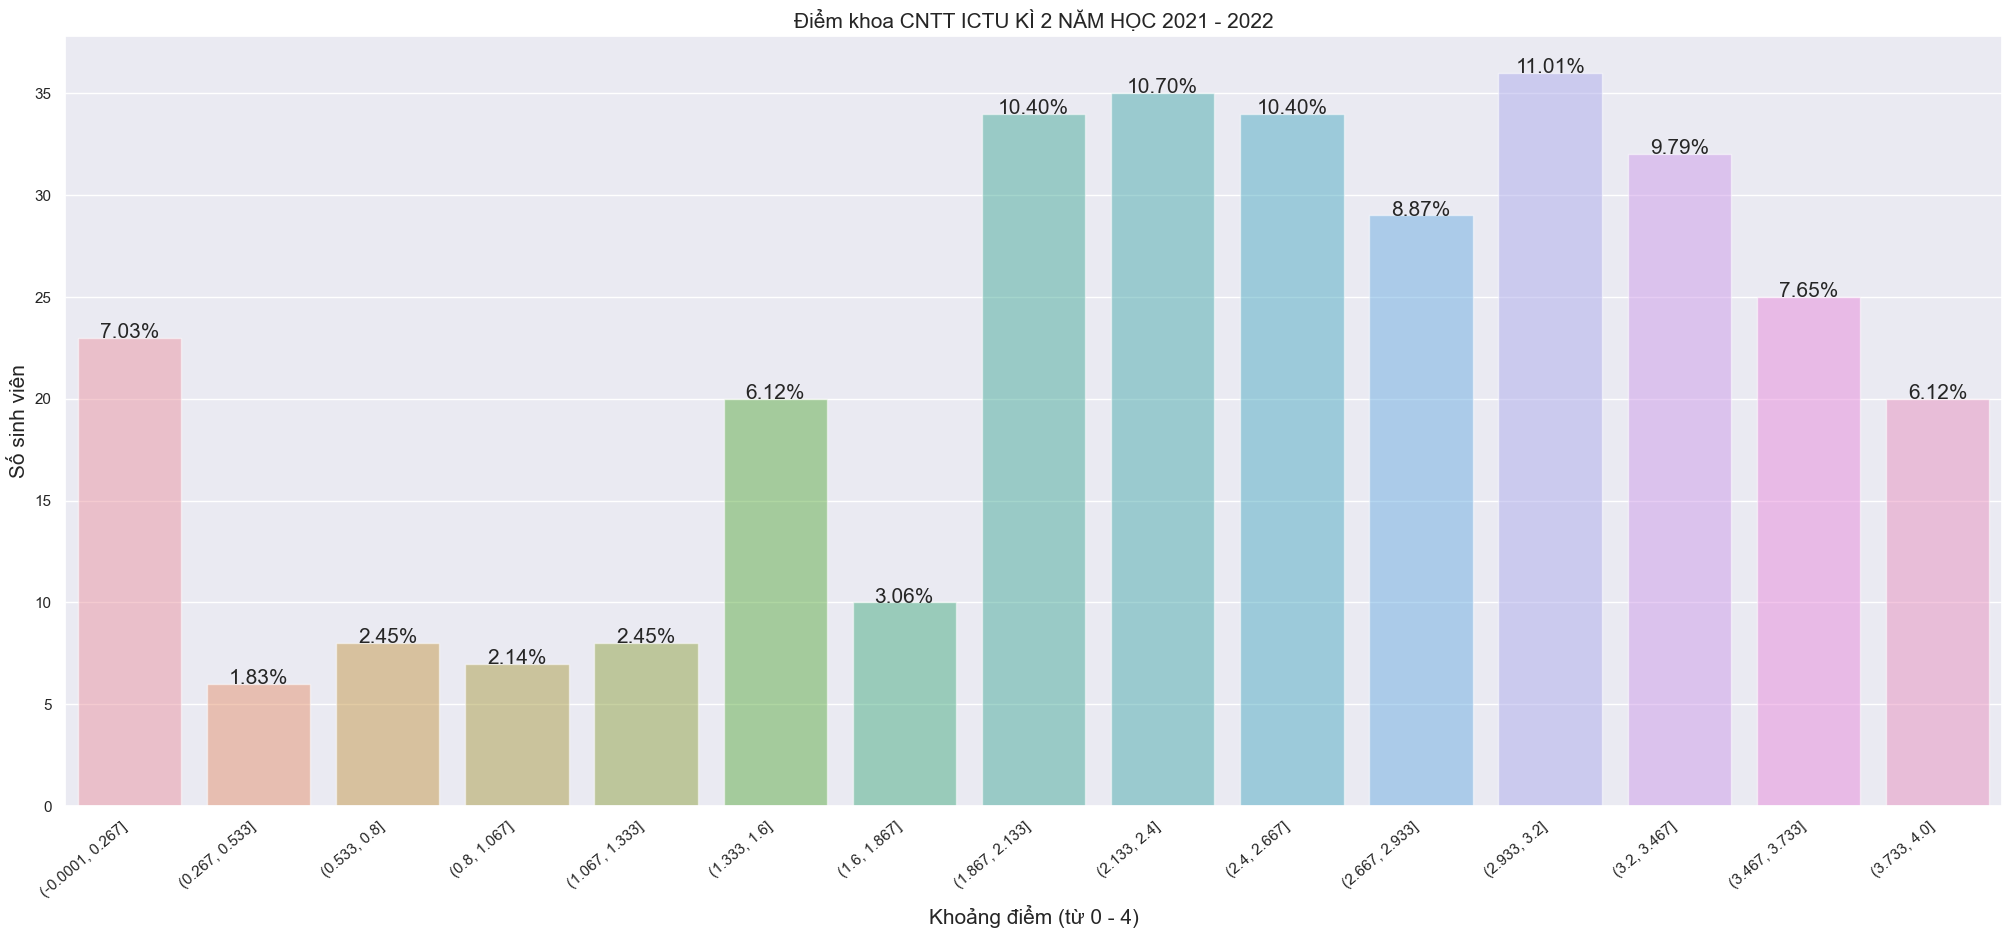

In [54]:
figure(figsize = (25,10))
plt.title("Điểm khoa CNTT ICTU KÌ 2 NĂM HỌC 2021 - 2022", size = 15)
ax = sns.countplot(x = "binned", data = K18Mark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18Mark4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)
    
plt.savefig("File ảnh điểm\\Điểm toàn khoa CNTT ICTU KÌ 2 NĂM HỌC 2021 - 2022.jpg")

In [55]:
nbins = 15
arrDiem = np.array(K18Mark4['Điểm hệ 4'])
bins = np.linspace(2.49999, arrDiem.max(), nbins -3)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18Mark4["binned"] = pd.cut(arrDiem, bins)
K18Mark4 = K18Mark4.dropna()
display(K18Mark4.head())
print(K18Mark4['binned'].value_counts())

Number of interval 15 bins is calculated:


array([2.49999   , 2.63635455, 2.77271909, 2.90908364, 3.04544818,
       3.18181273, 3.31817727, 3.45454182, 3.59090636, 3.72727091,
       3.86363545, 4.        ])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
2,DTC1954802020003,Mai Trung,Đức,ATTT K18A,2.93,"(2.909, 3.045]"
3,DTC19H4802020008,Nguyễn Hoàng,Hà,ATTT K18A,3.43,"(3.318, 3.455]"
7,DTC1954802020012,Nguyễn Trung,Nam,ATTT K18A,3.00,"(2.909, 3.045]"
8,DTC1854801030059,Nông Hồng,Sơn,ATTT K18A,2.81,"(2.773, 2.909]"
9,DTC19H4802020002,Nguyễn Thị Phương,Thảo,ATTT K18A,2.93,"(2.909, 3.045]"


(2.5, 2.636]      21
(2.909, 3.045]    21
(3.182, 3.318]    19
(3.318, 3.455]    18
(2.636, 2.773]    15
(2.773, 2.909]    13
(3.045, 3.182]    13
(3.591, 3.727]    13
(3.727, 3.864]    13
(3.455, 3.591]    12
(3.864, 4.0]       7
Name: binned, dtype: int64


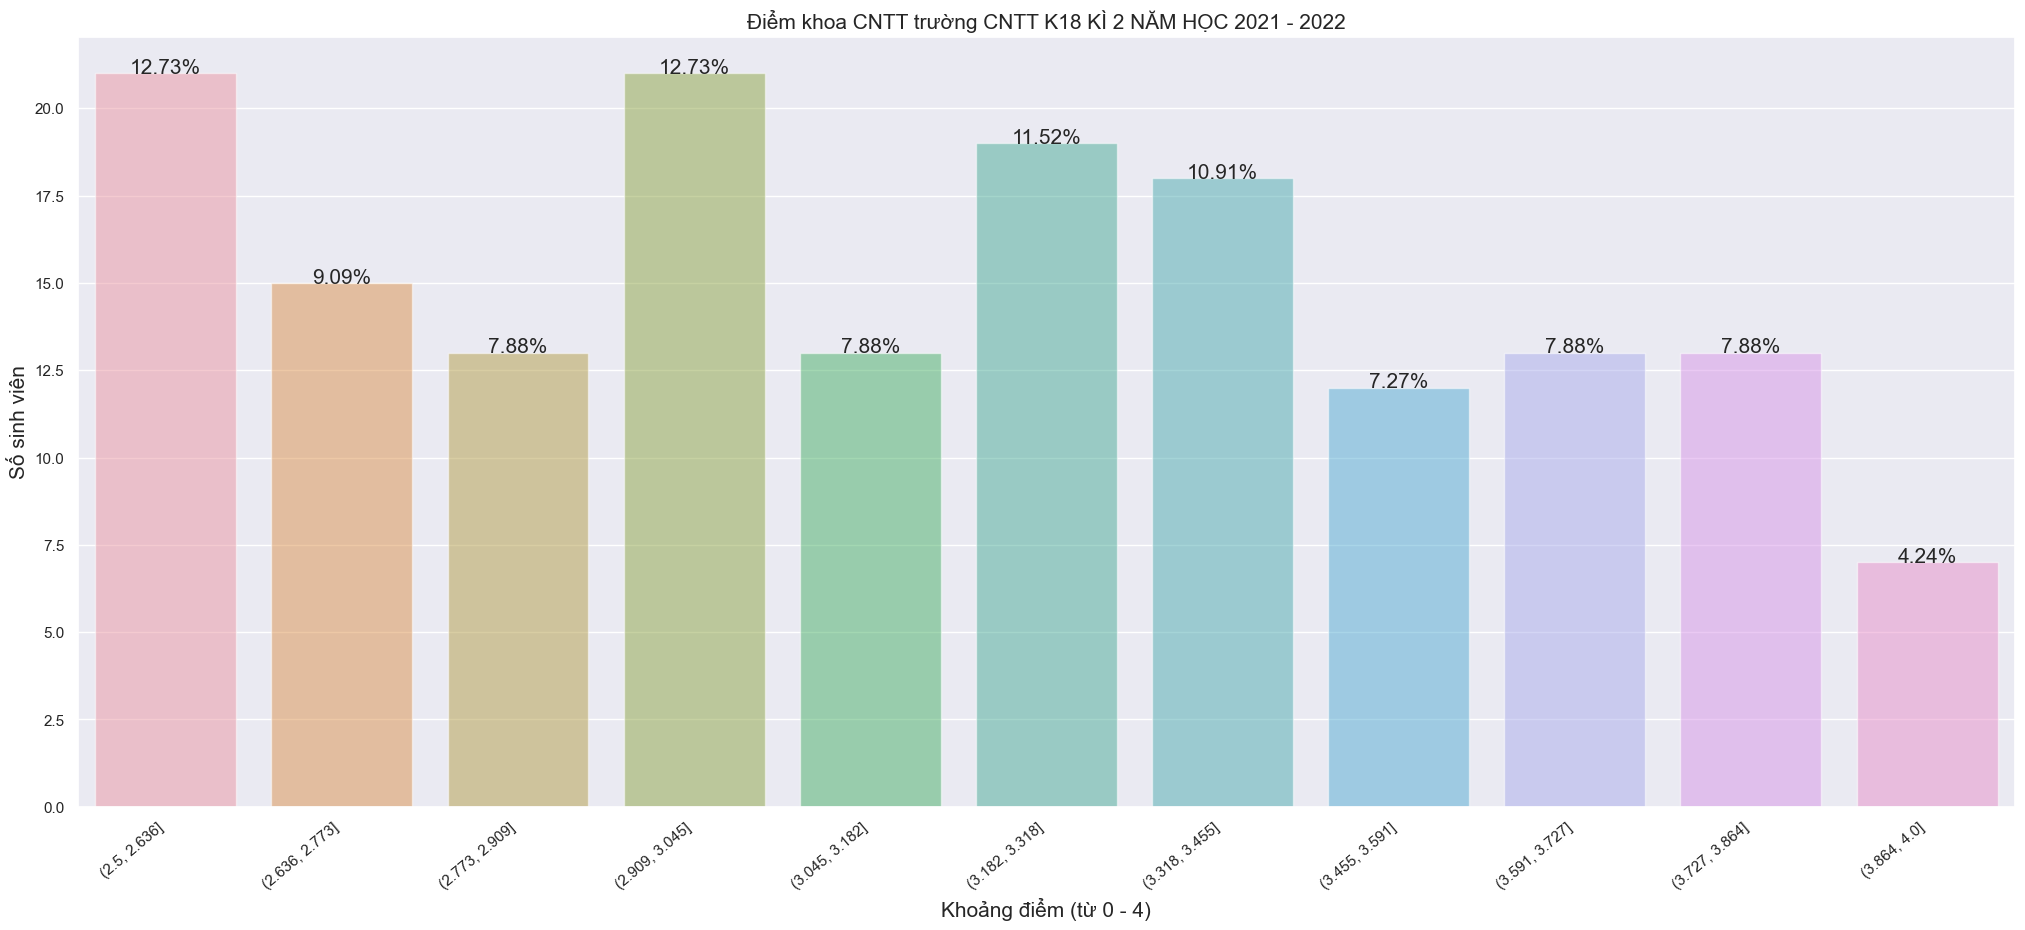

In [56]:
figure(figsize = (25,10))
plt.title("Điểm khoa CNTT trường CNTT K18 KÌ 2 NĂM HỌC 2021 - 2022", size = 15)
ax = sns.countplot(x = "binned", data = K18Mark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18Mark4[K18Mark4['Điểm hệ 4'] >= 2.5]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)

plt.savefig("File ảnh điểm\\Điểm lón hơn 2.5 khoa CNTT ICTU KÌ 2 NĂM HỌC 2021 - 2022.jpg")

In [57]:
K18CNTTMark4 = pd.read_excel("K18Mark.xlsx",na_values = ":", usecols = ["Mã SV","Họ","Tên","Lớp","Điểm hệ 4"], sheet_name = 'Ngành CNTT')
display(K18CNTTMark4.head())
print("Shape:",K18CNTTMark4.shape)
print(f"Min Điểm hệ 4: {K18CNTTMark4['Điểm hệ 4'].min()}, max điểm hệ 4: {K18CNTTMark4['Điểm hệ 4'].max()}")
print(f"Number of unique Lớp: {list(K18CNTTMark4['Lớp'].unique())}")
print("***FREQUENCY***")
print(f"<<<Count of Lớp>>> \n{K18CNTTMark4['Lớp'].value_counts()}")
print(f"<<<Count of Điểm>>> \n{K18CNTTMark4['Điểm hệ 4'].value_counts()}")

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4
0,DTC195480201CLC0002,Bùi Đức,Công,CNTT K18 CLC,3.37
1,DTC195480201CLC0004,Thái Văn,Cường,CNTT K18 CLC,3.16
2,DTC19H4802010104,Vũ Văn,Cường,CNTT K18 CLC,3.00
3,DTC195480201CLC0005,Nguyễn Tiến,Dũng,CNTT K18 CLC,3.37
4,DTC1954802010038,Trần Nguyên,Dũng,CNTT K18 CLC,3.16


Shape: (209, 5)
Min Điểm hệ 4: 0.0, max điểm hệ 4: 4.0
Number of unique Lớp: ['CNTT K18 CLC', 'CNTT K18G', 'CNTT K18I', 'CNTT K18K', 'CNTT K18L', 'CNTT K18M', 'CNTT K18N']
***FREQUENCY***
<<<Count of Lớp>>> 
CNTT K18G       49
CNTT K18I       31
CNTT K18M       30
CNTT K18N       29
CNTT K18 CLC    26
CNTT K18K       23
CNTT K18L       21
Name: Lớp, dtype: int64
<<<Count of Điểm>>> 
3.00    13
0.00    13
2.25    12
2.06    11
2.44     9
2.63     8
2.69     8
3.44     7
2.13     7
3.53     7
1.50     6
3.63     6
2.88     6
3.19     5
2.50     5
3.06     5
1.88     5
3.16     4
3.68     4
0.75     4
2.00     4
2.31     4
1.69     3
1.31     3
3.37     3
3.81     3
3.25     3
4.00     3
0.38     2
1.00     2
1.75     2
2.81     2
3.84     2
1.38     2
3.75     2
1.67     1
0.63     1
3.21     1
1.56     1
1.13     1
2.28     1
2.21     1
2.14     1
1.42     1
2.53     1
3.56     1
2.84     1
0.56     1
2.67     1
2.68     1
0.50     1
2.89     1
0.94     1
2.56     1
3.33     1
2.19     

In [58]:
nbins = 15
arrDiem = np.array(K18CNTTMark4['Điểm hệ 4'])
bins = np.linspace(2.49999, arrDiem.max(), 12)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18CNTTMark4["binned"] = pd.cut(arrDiem, bins)
display(K18CNTTMark4.head())
print(K18CNTTMark4["binned"].value_counts())

Number of interval 15 bins is calculated:


array([2.49999   , 2.63635455, 2.77271909, 2.90908364, 3.04544818,
       3.18181273, 3.31817727, 3.45454182, 3.59090636, 3.72727091,
       3.86363545, 4.        ])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC195480201CLC0002,Bùi Đức,Công,CNTT K18 CLC,3.37,"(3.318, 3.455]"
1,DTC195480201CLC0004,Thái Văn,Cường,CNTT K18 CLC,3.16,"(3.045, 3.182]"
2,DTC19H4802010104,Vũ Văn,Cường,CNTT K18 CLC,3.00,"(2.909, 3.045]"
3,DTC195480201CLC0005,Nguyễn Tiến,Dũng,CNTT K18 CLC,3.37,"(3.318, 3.455]"
4,DTC1954802010038,Trần Nguyên,Dũng,CNTT K18 CLC,3.16,"(3.045, 3.182]"


(2.5, 2.636]      15
(2.909, 3.045]    13
(3.318, 3.455]    12
(2.636, 2.773]    10
(2.773, 2.909]    10
(3.591, 3.727]    10
(3.045, 3.182]     9
(3.182, 3.318]     9
(3.455, 3.591]     8
(3.727, 3.864]     7
(3.864, 4.0]       3
Name: binned, dtype: int64


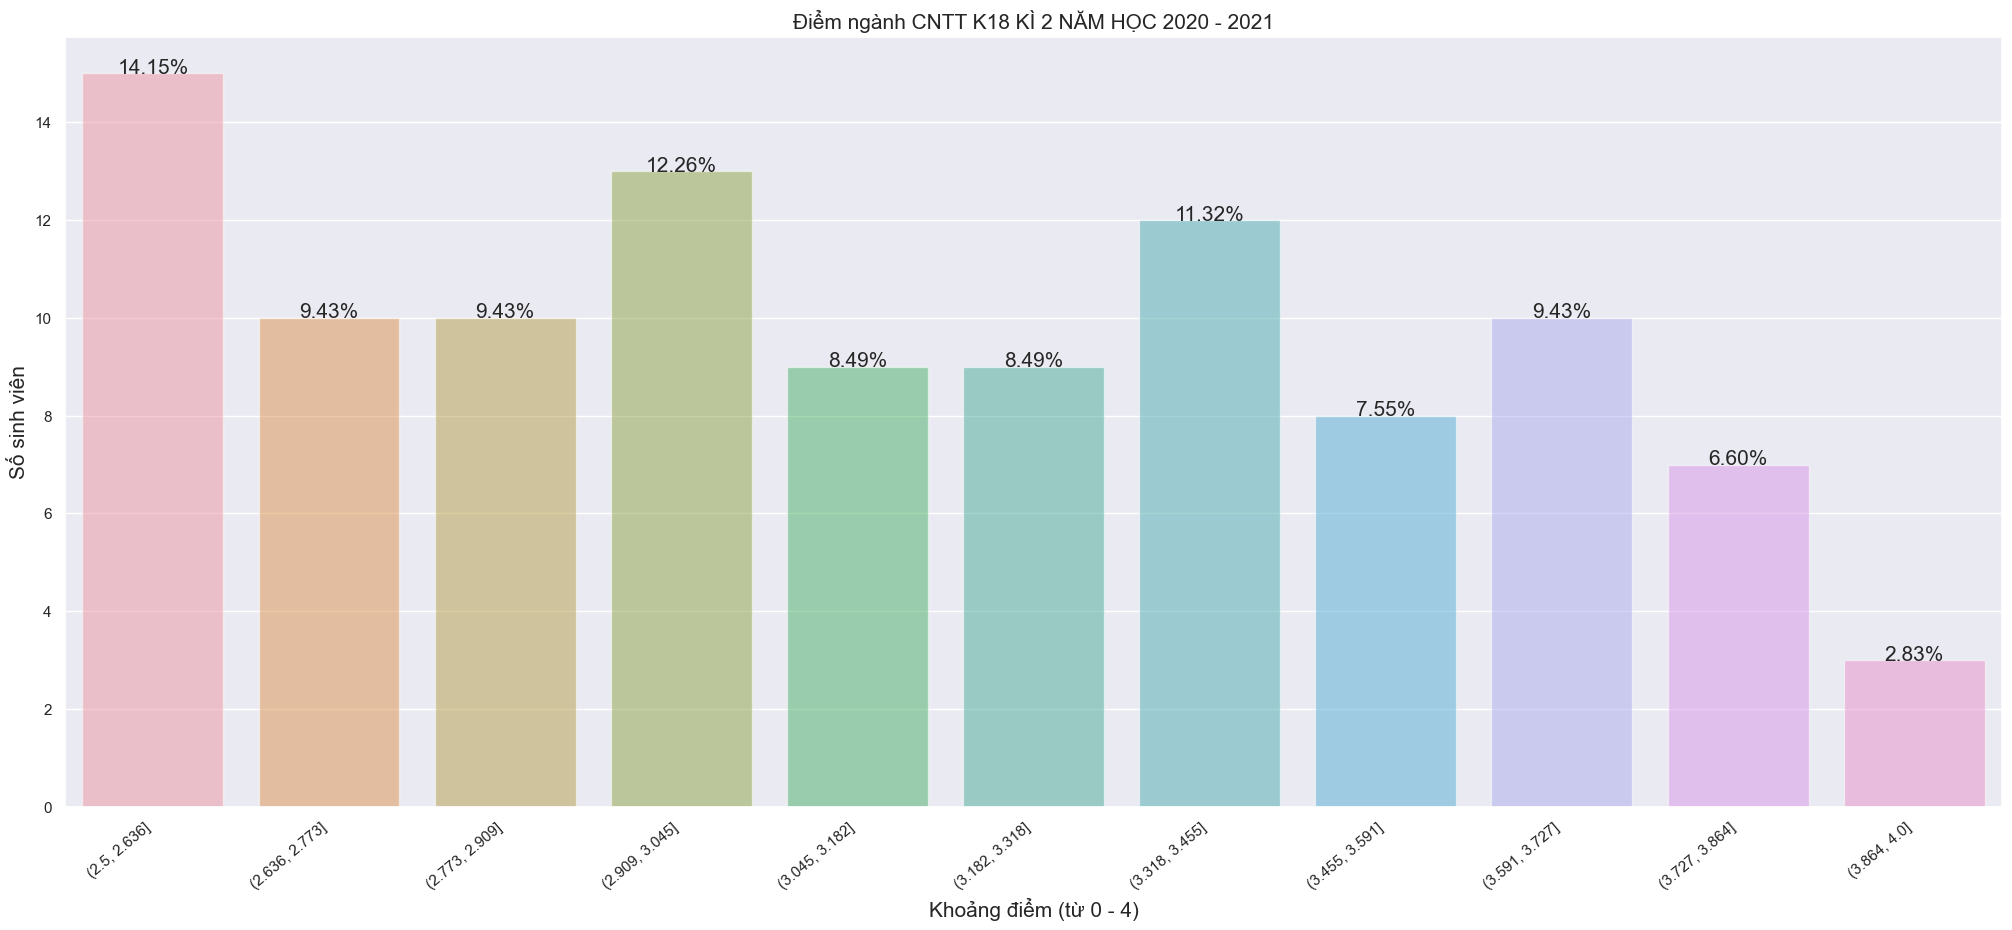

In [60]:
figure(figsize = (25,10))
plt.title("Điểm ngành CNTT K18 KÌ 2 NĂM HỌC 2020 - 2021", size = 15)
ax = sns.countplot(x = "binned", data = K18CNTTMark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18CNTTMark4[K18CNTTMark4['Điểm hệ 4'] >= 2.5]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)
plt.savefig("File ảnh điểm\\Điểm riêng ngành khoa CNTT.jpg")